In [46]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import gpmap.src.plot as plot

from gpmap.src.space import DiscreteSpace
from gpmap.src.randwalk import WMWSWalk

In [62]:
s = 50

x = np.arange(s)

i, j = [], []

prev_row = None
for row in range(s):
    row = [row * s + a for a in x]
    
    # Edges within the row
    i.extend(row[:-1] + row[1:])
    j.extend(row[1:] + row[:-1])
    
    # Edges between rows
    if prev_row is not None:
        i.extend(prev_row + row)
        j.extend(row + prev_row)
    
    prev_row = row

data = np.ones(len(i))
m = sp.sparse.csr_matrix((data, (i, j)))


In [91]:
scale = 0.03

xs, ys = np.meshgrid(x, x)
xs, ys

f = np.zeros((s, s))
peaks = [(0, 0), (0, s-1), (s-1, int(s/2-1))]
for peak in peaks:
    d_peak = np.sqrt((xs - peak[0])**2 + (ys - peak[1])**2)
    f += np.exp(-scale * d_peak)
f = f.flatten()

In [92]:
space = DiscreteSpace(adjacency_matrix=m, y=f)
print(space)

Discrete Space:
	Number of states: 2500
	State labels: [0,1,2,...,2497,2498,2499]
	States function values: [1.42,1.40,1.38,...,0.85,0.84,0.83]
	Number of edges: 9800.0


In [116]:

for logns in np.linspace()
rw = WMWSWalk(space)
rw.calc_visualization(Ns=Ns)
ndf, edf = rw.nodes_df, space.get_edges_df()
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
plot.plot_visualization(axes, ndf, edges_df=edf, nodes_size=10, edges_alpha=1)

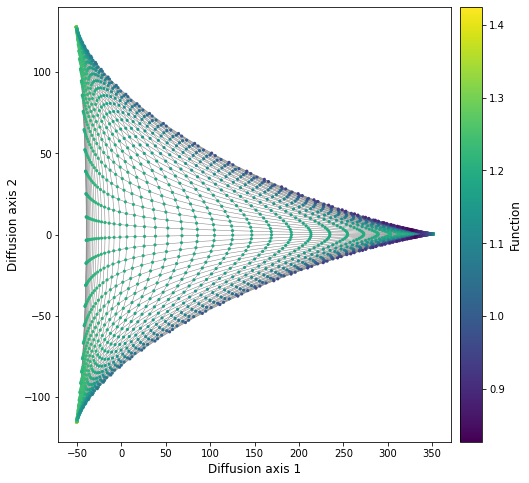